# Classification Accuracy

[Data School](https://www.youtube.com/watch?v=85dtiMz9tSo)

In [2]:
import pandas as pd
dataset = 'data/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(dataset, header=None, names=col_names)

In [3]:
pima.head() # Print first 5 rows

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question
Can we predict the diabetes status of a patient given their health measurements?

In [4]:
# Define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [6]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Predicting testing set
y_pred_class = logreg.predict(X_test)

## Classification accuracy
The precentage of correct predictions

In [9]:
# Calculating accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334


## Null accuracy
The accuracy that could be achieved by always predicting the most frequent class

In [10]:
# Examine the class distribution of the testing set (Pandas series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [11]:
# Calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [12]:
# Calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [13]:
# Calcualte null accuracy (Binary classification coded it as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [15]:
# Calculate null accuracy (Multi-class classification)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

### Comparison
Comparing the true and predicted response values

In [17]:
# Print first 25 true and predicted responses
print("True:", y_test.values[0:25])
print("Pred:", y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Conclusion:
* Classification accuracy is the easiest classification metric to understand
* Underlying distribution of response values
* Don't telling the types of errors that made by classifier

## Confusion matrix
Table that describes the performance of a classification model

In [18]:
print(metrics.confusion_matrix(y_test, y_pred_class)) # (actual, predictions)

[[114  16]
 [ 46  16]]


In [19]:
# Print first 25 true and predicted responses
print("True:", y_test.values[0:25])
print("Pred:", y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [54]:
# Saving confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

### Metrics computed from a confusion matrix

In [45]:
TP + TN + FP + FN

192

In [55]:
### Classification Accuracy: Overall, how often the classifier correct?
print((TP + TN) /  float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334
0.6770833333333334


### Classification Error: Missclassification Rate

In [56]:
print((FP + FN) /  float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3229166666666667
0.32291666666666663


### Sensitivity
When actual values is positive, how often predictions correct

In [57]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[114,  16],
       [ 46,  16]], dtype=int64)

In [58]:
TP, TN, FN, FP

(16, 114, 46, 16)

In [61]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.25806451612903225
0.25806451612903225


### Specifictiy
When actual values is negative, how often prediction correct

In [62]:
print(TN/float(TN+FP))

0.8769230769230769


### False Positive Rate
When actual values is negative, how often predictions incorrect

In [63]:
print(FP/float(TN+FP))

0.12307692307692308


### Precision
When a positve value is predicted, how often is prediction correct

In [64]:
print(TP / float(TP+FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5
0.5


## ADJUSTING THE CLASSIFICATION THRESHOLD

In [65]:
# Print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [66]:
# Print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [67]:
# Print the first 10 predicted probailities of class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [68]:
# Store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [69]:
y_pred_prob

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697,
       0.32293716, 0.82407106, 0.34811449, 0.18091391, 0.42276465,
       0.15215651, 0.44654688, 0.07349027, 0.46635231, 0.35046192,
       0.47202441, 0.39192458, 0.15370776, 0.44204822, 0.10103982,
       0.22638643, 0.05588069, 0.74269038, 0.10490497, 0.16748492,
       0.41374945, 0.34425078, 0.18250176, 0.37390015, 0.0845611 ,
       0.38783593, 0.44397396, 0.1092489 , 0.27514916, 0.28171778,
       0.24669244, 0.40272108, 0.22189867, 0.26339471, 0.66873945,
       0.00706526, 0.10628373, 0.17683771, 0.32535803, 0.24095393,
       0.282465  , 0.20914899, 0.7934619 , 0.37804475, 0.42967842,
       0.08943273, 0.14628981, 0.74255446, 0.14351044, 0.01930679,
       0.68458888, 0.46034603, 0.08118313, 0.25311321, 0.21150143,
       0.25836317, 0.46830552, 0.16282169, 0.41883989, 0.38983925,
       0.15798729, 0.218916  , 0.24359488, 0.64015047, 0.49117

In [70]:
# Allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

Text(0, 0.5, 'Frequency')

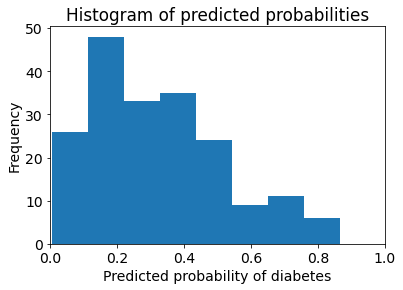

In [71]:
# Histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probability of diabetes")
plt.ylabel("Frequency")

### Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [86]:
# Predict diabetes if the predicted probabilit is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob.reshape(1,-1), threshold=0.3)[0]

In [87]:
# Print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [88]:
# Print the first 10 predicted class with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [89]:
# Print confusion threshold = 0.5
print(confusion)

[[114  16]
 [ 46  16]]


In [93]:
# New confusion threshold = 0.3
print(metrics.confusion_matrix(y_test, y_pred_class))

[[82 48]
 [17 45]]


In [94]:
# Sensitivity increased
print(45 / float(45 + 17))

0.7258064516129032


In [96]:
# Specificity decreased
print(82 / float (82 + 48))

0.6307692307692307


Sensitivity and Specificity is inversed

## ROC Curves and AUC

### Plot ROC curves

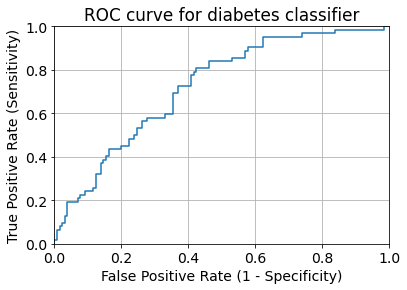

In [97]:
# Important: First argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve for diabetes classifier")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)

* ROC curve can help for choosing a threshold that balances sensitivity and specificity in a way that makes sense
* You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [98]:
# Define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print("Sensitivity:", tpr[thresholds > threshold][-1])
    print("Specificity:", 1 - fpr[thresholds > threshold][-1])

In [99]:
evaluate_threshold(0.5)

Sensitivity: 0.25806451612903225
Specificity: 0.8769230769230769


In [100]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6307692307692307


AUC is the percentage of the ROC plot that is underneath the curve

In [101]:
# First argument is true values, second is predicted probabailities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7227047146401985


In [102]:
# Calcualte cross validation of AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225

# Conclusion

## A. Confusion Matrix
* Allows callculating variety of metrics
* Useful for multi-class probles

## B. ROC/AUC 
* Don't require set a classification threshold
* Useful in high class imbalance